### <strong>第三次作品：學習分類器的評比實驗 </strong>
學號：711233112

姓名：留筠雅
<hr>

 <font color=skyblue>作品目標</font>：  
本次專題計畫旨在比較不同分類器的效果，通過對三組資料進行分類學習和評估。所選用的分類器包括：

- 多項式羅吉斯回歸 (Multinomial Logistic Regression)
- 支援向量機 (Support Vector Machine)
- 神經網絡 (Neural Network)
  
通過這個作品，希望為不同類型的問題提供分類器或是參數設定的選擇建議，並了解各個分類器在不同條件下的運作情況。
<hr>

### 紅酒資料集
來自 3 個產區，178 瓶葡萄酒，含 13 種葡萄酒成分。

導入套件

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler   
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA    
from sklearn.svm import SVC,LinearSVC,LinearSVR
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

導入資料

In [3]:
df = pd.read_excel('data\wine.xlsx')
X = np.array(df.iloc[:, :-1]) # 排 除 最 後 一 欄 標 籤
y = np.array(df.iloc[:, -1]) # 標籤欄
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


切割訓練資料與測試資料

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

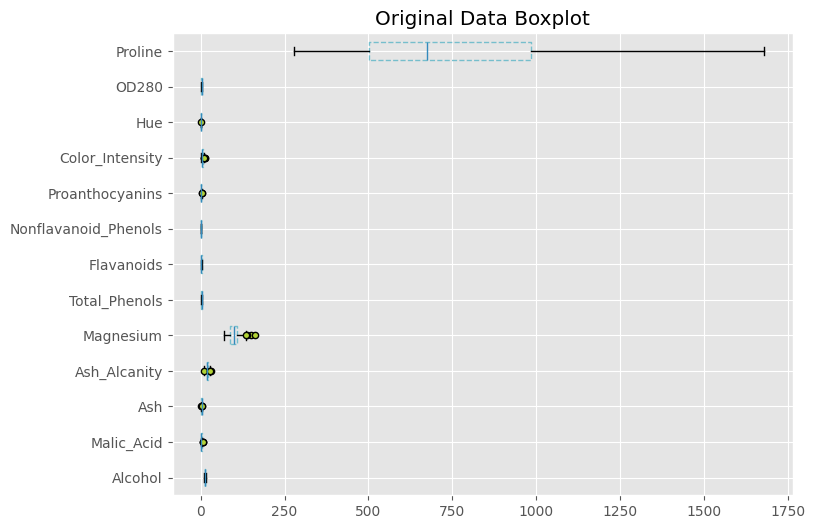

In [44]:
# 畫盒鬚圖
ratings = np.array(X)
categories = np.array(df.columns[:-1])
# Orignal Data Boxplot 
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
boxprops = dict(linestyle = '--', linewidth = 1, color = '#76becc')
flierprops = dict(marker='o', markerfacecolor = '#b2d235',
markersize = 4.5, linestyle = 'none')
plt.boxplot(ratings, boxprops = boxprops, \
flierprops = flierprops, \
labels = categories, vert = False)
plt.title('Original Data Boxplot')
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 從這組紅酒的資料來看，*proline* 的數字大小與變異與其他變數相差頗大，這對做主成分分析可能不利，因此有必要先將這些差距以標準化的方式拉近些，通過標準化，可以確保每個變數對主成分的貢獻是基於它們的變異性，而不是基於它們的尺度。

進行標準化

In [28]:
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.fit_transform(X_test)

### 使用原始資料訓練多元羅吉斯回歸模型

In [29]:
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1)
clf_original_lbfgs= LogisticRegression(solver = 'lbfgs', **opts)# default
clf_original_newtoncg= LogisticRegression(solver = 'newton-cg', **opts)
clf_original_liblin= LogisticRegression(solver = 'liblinear', **opts)

clf_original_lbfgs.fit(X_train_, y_train)
y_pred_lbfgs = clf_original_lbfgs.predict(X_test_)
# 測 試 資 料 之 準 確 率 回 報
print(f'accuracy for testing data under lbfgs:{accuracy_score(y_test, y_pred_lbfgs):.2%}\n')
print(classification_report(y_test, y_pred_lbfgs))

clf_original_newtoncg.fit(X_train_, y_train)
y_pred_new = clf_original_newtoncg.predict(X_test_)
# 測 試 資 料 之 準 確 率 回 報
print(f'accuracy for testing data under newton-cg:{accuracy_score(y_test, y_pred_new):.2%}\n')
print(classification_report(y_test, y_pred_new))

clf_original_liblin.fit(X_train_, y_train)
y_pred_liblin = clf_original_liblin.predict(X_test_)
# 測 試 資 料 之 準 確 率 回 報
print(f'accuracy for testing data under liblinear:{accuracy_score(y_test, y_pred_liblin):.2%}\n')
print(classification_report(y_test, y_pred_liblin))



accuracy for testing data under lbfgs:98.61%

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      0.96      0.98        27
           3       0.95      1.00      0.97        19

    accuracy                           0.99        72
   macro avg       0.98      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72

accuracy for testing data under newton-cg:98.61%

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      0.96      0.98        27
           3       0.95      1.00      0.97        19

    accuracy                           0.99        72
   macro avg       0.98      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72

[LibLinear]accuracy for testing data under liblinear:98.61%

              precision    recall  f1-score   support

           1       1.00   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 可以看出這三個演算法對於紅酒資料集這種小型資料沒有太大影響。
- 多元羅吉斯迴歸模型預測準確率為高達 98.61% 。

也可以使用 confusion matrix 來觀察每一個類別被分類的準確度，進而了解哪些類別或該類別的資料有甚麼特殊之處。

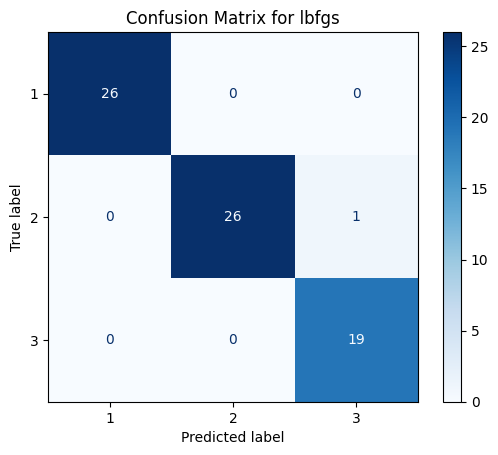

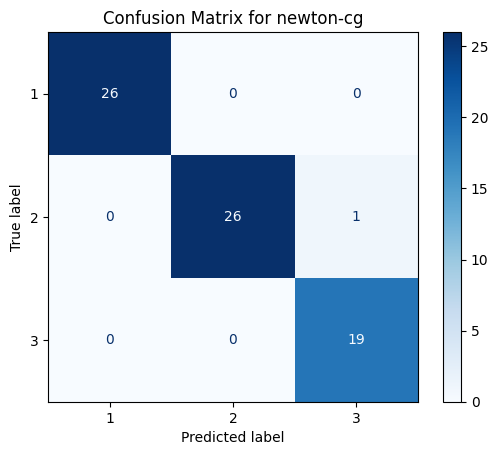

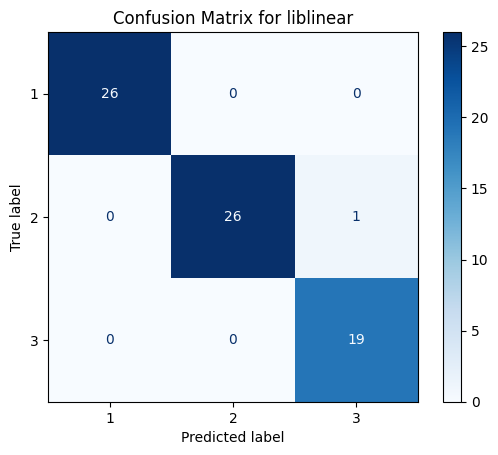

In [30]:
# 混淆矩陣
cm = confusion_matrix(y_test, y_pred_lbfgs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_original_lbfgs.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for lbfgs')
plt.show()

cm = confusion_matrix(y_test, y_pred_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_original_newtoncg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for newton-cg')
plt.show()

cm = confusion_matrix(y_test, y_pred_liblin)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_original_liblin.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for liblinear')
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 從這三張視覺化後的圖片可以看出在 y = 2 時，可能會有預測錯誤的情況發生，被預測成 y = 3。

### 使用主成分分析後的資料訓練多元羅吉斯回歸模型。

In [32]:
pca = PCA(n_components = 0.7).fit(X_train_)
Z_train = pca.transform(X_train_)
Z_test = pca.transform(X_test_)
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1)


clf_pca_lbfgs= LogisticRegression(solver = 'lbfgs', **opts)# default
clf_pca_newtoncg= LogisticRegression(solver = 'newton-cg', **opts)
clf_pca_liblin= LogisticRegression(solver = 'liblinear', **opts)

clf_pca_lbfgs.fit(Z_train, y_train)
y_pred_lbfgs = clf_pca_lbfgs.predict(Z_test)
print(f'accuracy for testing data under lbfgs:{clf_pca_lbfgs.score(Z_test, y_test):.2%}\n')
print(classification_report(y_test, y_pred_lbfgs))

clf_pca_newtoncg.fit(Z_train, y_train)
y_pred_new = clf_pca_newtoncg.predict(Z_test)
print(f'accuracy for testing data under newton-cg:{clf_pca_newtoncg.score(Z_test, y_test):.2%}\n')
print(classification_report(y_test, y_pred_new))

clf_pca_liblin.fit(Z_train, y_train)
y_pred_liblin = clf_pca_liblin.predict(Z_test)
print(f'accuracy for testing data under liblinear:{clf_pca_liblin.score(Z_test, y_test):.2%}\n')
print(classification_report(y_test, y_pred_liblin))


accuracy for testing data under lbfgs:94.44%

              precision    recall  f1-score   support

           1       0.93      0.96      0.94        26
           2       0.96      0.89      0.92        27
           3       0.95      1.00      0.97        19

    accuracy                           0.94        72
   macro avg       0.95      0.95      0.95        72
weighted avg       0.95      0.94      0.94        72

accuracy for testing data under newton-cg:94.44%

              precision    recall  f1-score   support

           1       0.93      0.96      0.94        26
           2       0.96      0.89      0.92        27
           3       0.95      1.00      0.97        19

    accuracy                           0.94        72
   macro avg       0.95      0.95      0.95        72
weighted avg       0.95      0.94      0.94        72

[LibLinear]accuracy for testing data under liblinear:94.44%

              precision    recall  f1-score   support

           1       0.93   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- lbfgs, newton-cg, liblinear 這三個演算法裡，預測出來的準確率一樣高( 94.44% )。
- PCA後的資料，取主成分比例為 0.7，代表這些資料可以解釋 70% 的變異量。雖然會喪失資訊量但留下來的是有意義的訊息。
- 當降低了特徵空間的維度，減少了需要處理的數據量，便降低了計算的複雜度和成本。
- PCA後的資料，在這三個演算法裡，預測的準確率與原始資料( 98.61% )差異不大。


### 使用原始資料訓練 SVM 模型。

In [35]:
C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6))
# opts = dict(C = C, decision_function_shape = ’ovo’, \
# tol = 1e−6, max_iter = int(1e6))
clf_svm_linear = SVC(kernel="linear", **opts)
clf_svm_rbf = SVC(kernel="rbf", gamma=0.2, **opts)
clf_svm_poly = SVC(kernel="poly", degree=3, gamma="auto", **opts)
clf_svm_rest = LinearSVC(**opts) # one vs the rest
#para = {"kernal":["linear", "rbf", "poly"], "C":[0.1, 1, 10], "gamma":[0.1, 1, 10]}
clf_svm_linear.fit(X_train_,y_train)
predictions=clf_svm_linear.predict(X_test_)
print(f'accuracy for testing data under linear:{accuracy_score(y_test, predictions):.2%}\n')
print(classification_report(y_test, predictions))

clf_svm_rbf.fit(X_train_,y_train)
predictions=clf_svm_rbf.predict(X_test_)
print(f'accuracy for testing data under rbf:{accuracy_score(y_test, predictions):.2%}\n')
print(classification_report(y_test, predictions))

clf_svm_poly.fit(X_train_,y_train)
predictions=clf_svm_poly.predict(X_test_)
print(f'accuracy for testing data under poly:{accuracy_score(y_test, predictions):.2%}\n')
print(classification_report(y_test, predictions))

clf_svm_rest.fit(X_train_,y_train)
predictions=clf_svm_rest.predict(X_test_)
print(f'accuracy for testing data under LinearSVC:{accuracy_score(y_test, predictions):.2%}\n')
print(classification_report(y_test, predictions))

accuracy for testing data under linear:98.61%

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      0.96      0.98        27
           3       0.95      1.00      0.97        19

    accuracy                           0.99        72
   macro avg       0.98      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72

accuracy for testing data under rbf:97.22%

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       0.93      1.00      0.96        27
           3       1.00      0.89      0.94        19

    accuracy                           0.97        72
   macro avg       0.98      0.96      0.97        72
weighted avg       0.97      0.97      0.97        72

accuracy for testing data under poly:90.28%

              precision    recall  f1-score   support

           1       0.95      0.77      0.85    

c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 在選擇決策函數（decision function）時，有兩種常見的方法：

  1. 一對其他（One-vs-Rest）：對於每個類別，建立一個分類器，該分類器將該類別的樣本與其他所有類別的樣本作為對立面。這是預設選項。
  2. 一對一（One-vs-One）：採用一對一的分組方式，即為每個類別組合建立一個分類器，該分類器將兩個類別的樣本分開。
  3. LinearSVC( ) 則是採一對其他的模式， SVC( ) 在這裡是設定一對一模式。
- linear和 LinearSVC 是這四個 SVM 模型裡預測準確率最高的( 98.61% )，但其實所有模型都有 90% 以上的準確率。
  

### 使用主成分分析後訓練 SVM 模型。

In [39]:
# PCA
clf_svm_linear.fit(Z_train,y_train)
predictions=clf_svm_linear.predict(Z_test)
print(f'accuracy for testing data under linear:{clf_svm_linear.score(Z_test, y_test):.2%}\n')
print(classification_report(y_test, predictions))

clf_svm_rbf.fit(Z_train,y_train)
predictions=clf_svm_rbf.predict(Z_test)
print(f'accuracy for testing data under rbf:{clf_svm_rbf.score(Z_test, y_test):.2%}\n')
print(classification_report(y_test, predictions))

clf_svm_poly.fit(Z_train,y_train)
predictions=clf_svm_poly.predict(Z_test)
print(f'accuracy for testing data under poly:{clf_svm_poly.score(Z_test, y_test):.2%}\n')
print(classification_report(y_test, predictions))

clf_svm_rest.fit(Z_train,y_train)
predictions=clf_svm_rest.predict(Z_test)
print(f'accuracy for testing data under LinearSVC:{clf_svm_rest.score(Z_test, y_test):.2%}\n')
print(classification_report(y_test, predictions))



accuracy for testing data under linear:94.44%

              precision    recall  f1-score   support

           1       0.93      0.96      0.94        26
           2       0.96      0.89      0.92        27
           3       0.95      1.00      0.97        19

    accuracy                           0.94        72
   macro avg       0.95      0.95      0.95        72
weighted avg       0.95      0.94      0.94        72

accuracy for testing data under rbf:97.22%

              precision    recall  f1-score   support

           1       0.93      1.00      0.96        26
           2       1.00      0.93      0.96        27
           3       1.00      1.00      1.00        19

    accuracy                           0.97        72
   macro avg       0.98      0.98      0.97        72
weighted avg       0.97      0.97      0.97        72

accuracy for testing data under poly:91.67%

              precision    recall  f1-score   support

           1       0.89      0.96      0.93    

c:\Users\f9006\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 這四個 SVM 模型裡以 rbf 預測出來的準確率最高( 97.22% )，所有模型都有 91% 以上的準確率。
- 整體來說，有 PCA 過後的資料並沒有降低太多預測準確率。

### 利用原始資料訓練 ANN 模型

In [60]:
# hidden_layers = (512,) # one hidden layer
# activation = 'relu' # the default
hidden_layers = (30,)
activation = 'logistic'
opts = dict(hidden_layer_sizes = hidden_layers , verbose = False, \
activation = activation, tol = 1e-6, max_iter = int(1e6))

clf_MLP_sgd = MLPClassifier(solver = 'sgd', **opts) 
clf_MLP_lbfgs = MLPClassifier(solver = 'lbfgs', **opts) 
clf_MLP_adam = MLPClassifier(solver = 'adam', **opts) 

clf_MLP_sgd.fit(X_train_, y_train)
predictions_sgd = clf_MLP_sgd.predict(X_test_)
print(f'accuracy for testing data under sgd:{accuracy_score(y_test, predictions):.2%}\n')
print(classification_report(y_test, predictions_sgd))

clf_MLP_lbfgs.fit(X_train_, y_train)
predictions_lbfgs = clf_MLP_lbfgs.predict(X_test_)
print(f'accuracy for testing data under lbfgs:{accuracy_score(y_test, predictions):.2%}\n')
print(classification_report(y_test, predictions_lbfgs))

clf_MLP_adam.fit(X_train_, y_train)
predictions_adam = clf_MLP_adam.predict(X_test_)
print(f'accuracy for testing data under adam:{accuracy_score(y_test, predictions):.2%}\n')
print(classification_report(y_test, predictions_adam))


accuracy for testing data under sgd:98.61%

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      0.96      0.98        27
           3       0.95      1.00      0.97        19

    accuracy                           0.99        72
   macro avg       0.98      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72

accuracy for testing data under lbfgs:98.61%

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      0.96      0.98        27
           3       0.95      1.00      0.97        19

    accuracy                           0.99        72
   macro avg       0.98      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72

accuracy for testing data under adam:98.61%

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 針對紅酒資料集而言，ANN 模型裡神經元個數只選 30 個且只有 1 層隱藏層。這 3 個 ANN 模型就有 98.61% 的預測準確率。 
- 不同演算法預測出的模型準確率，差別不大。

### 利用主成分分析後的資料訓練 ANN 模型

In [49]:
# PCA
clf_MLP_sgd.fit(Z_train, y_train)  
predictions_pca_sgd = clf_MLP_sgd.predict(Z_test)
print(f'accuracy for testing data under sgd:{clf_MLP_sgd.score(Z_test, y_test):.2%}\n')
print(classification_report(y_test, predictions_pca_sgd))

clf_MLP_lbfgs.fit(Z_train, y_train)
predictions_pca_lbfgs = clf_MLP_lbfgs.predict(Z_test)
print(f'accuracy for testing data under lbfgs:{clf_MLP_lbfgs.score(Z_test, y_test):.2%}\n')
print(classification_report(y_test, predictions_pca_lbfgs))

clf_MLP_adam.fit(Z_train, y_train)
predictions_pca_adam = clf_MLP_adam.predict(Z_test)
print(f'accuracy for testing data under adam:{clf_MLP_adam.score(Z_test, y_test):.2%}\n')
print(classification_report(y_test, predictions_pca_adam))


accuracy for testing data under sgd:94.44%

              precision    recall  f1-score   support

           1       0.93      0.96      0.94        26
           2       0.96      0.89      0.92        27
           3       0.95      1.00      0.97        19

    accuracy                           0.94        72
   macro avg       0.95      0.95      0.95        72
weighted avg       0.95      0.94      0.94        72

accuracy for testing data under lbfgs:91.67%

              precision    recall  f1-score   support

           1       0.89      0.96      0.93        26
           2       0.92      0.85      0.88        27
           3       0.95      0.95      0.95        19

    accuracy                           0.92        72
   macro avg       0.92      0.92      0.92        72
weighted avg       0.92      0.92      0.92        72

accuracy for testing data under adam:94.44%

              precision    recall  f1-score   support

           1       0.87      1.00      0.93     

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 這三個 ANN 模型裡以 sgd 和 adam 演算法預測出來的準確率最高( 94.44% )，所有模型都有 91% 以上的準確率。
- 整體來說，有 PCA 過後的資料並沒有降低太多預測準確率。

繪製 confusion matrix 來觀察每一個類別被分類的準確度，這裡選擇 adam 演算法所計算的 ANN 模型。

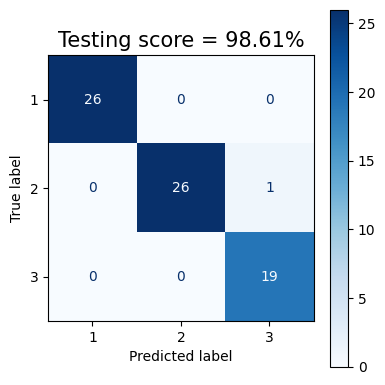

In [66]:

score_1 = 100*accuracy_score(y_test, predictions_sgd)
title_1 = 'Testing score = {:.2f}%'.format(score_1)

cm = confusion_matrix(y_test, predictions_sgd)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_MLP_sgd.classes_,)

fig, ax = plt.subplots(figsize=(4,4))

disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='horizontal')
plt.title(title_1, fontsize=15)

plt.tight_layout()
plt.show()



**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 視覺化後的圖片可以看出在 y = 2 時，可能會有預測錯誤的情況發生，被預測成 y = 3。

<hr>

#### **<font color=	#2E8B57 >原始資料的模型訓練觀察結果</font>**
比較 3 組學習器的模型預測準確率，從每個學習器裡取最高測準確率
 - 多項式羅吉斯回歸 98.61%
 - 支援向量機 98.61%
 - 神經網路 98.61%


#### **<font color=	#2E8B57 >主成分分析後的資料的模型訓練觀察結果</font>**
 - 多項式羅吉斯回歸 94.44%
 - 支援向量機 97.22%
 - 神經網路 94.44%



#### **<font color=#FA8072> 整體觀察結果：</font>**
1. 以紅酒資料集來說，這三種學習分類器預測的效果皆不錯，且紅酒資料集是這三個資料集裡預測準確度最高的，推測是分類數少，模型較好分類。
2. 有主成分分析的資料整體而言不會降低太多模型預測準確率。
<hr>